# Import

In [1]:
import pandas as pd
import numpy as np

# Using Machine Learning

In [2]:
df=pd.read_csv('file:///F:/Restaurant_Reviews%20-%20Restaurant_Reviews.csv')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
df.corr().describe()

,Liked
count,1.0
mean,1.0
std,NaN
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [10]:
df.max()

Review    you can watch them preparing the delicious food!)
Liked                                                     1
dtype: object

In [11]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Liked    0.5
dtype: float64

In [12]:
df.min()

Review    !....THE OWNERS REALLY REALLY need to quit bei...
Liked                                                     0
dtype: object

In [13]:
df.shape

(1000, 2)

In [15]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [16]:
x=df.Review.values

In [17]:
y=df.Liked.values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv=CountVectorizer()
x_train=cv.fit_transform(xtrain)

In [22]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
model=MultinomialNB()
model.fit(x_train,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
x_test=cv.transform(xtest)

In [26]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
model.score(x_test,ytest)*100

79.5

In [28]:
 text=['The food is really bad']

In [29]:
cv_text=cv.transform(text)

In [30]:
model.predict(cv_text)

array([0], dtype=int64)

In [31]:
text2=['The food is really good']

In [32]:
cv_text2=cv.transform(text2)

In [33]:
model.predict(cv_text2)

array([1], dtype=int64)

# Accuracy--------> 79.5

# Using Deep Learning

In [36]:
import nltk
import re # Regular Expression
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Md Asif
[nltk_data]     Ikbal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
df.shape

(1000, 2)

In [39]:
corpus=[] #empty list

for i in range(0,1000):   #0 theke 1000 er age porjonto
    review=re.sub(pattern='[^a-zA-Z]',repl="  ",string=df['Review'][i]) #-----> [^a-zA-Z] just a theke z porjonto nibe ,kno samble nibe na /re=regular expression/sub=subtract/repl="  "---> space gulo tik thakbe ti "  " eta ,space na dile akta line hbe/[i]---> proti ta columns access korbe 
    
    review=review.lower() #lower ---> small latter e hbe 
    
    review_words=review.split() #protita word er token/root word ber korbo/ 'split'---->protita word alada kora 
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))] #list comprehinson.['word'--> variable]/ word cloud er moddhe je word gulo thakbe se gulo stopwords er vitore ase ki na ta check korbe,jodi thake tahole ta append korbe r na thkle bad kore dibe  
    
    ps= PorterStemmer() 
    review=[ps.stem(word) for word in review_words] #review word er moddhe je word gulo thakbe ta strimming korbo./[]---->and ta akta list e raktesi.
    review=' '.join(review) #prothome word gulo ke alada korsi ,then stimming korsi and abar join kore akta sentence banacci
    corpus.append(review) 

In [40]:
corpus[0:10]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [41]:
count_vec=CountVectorizer(max_features=1500)

In [43]:
a=count_vec.fit_transform(corpus).toarray() #corpus--->39 number cell/toarray()---> matrix e convert kora
b=df.iloc[:,1].values

In [44]:
atrain, atest, btrain, btest = train_test_split(a, b, test_size=0.2, random_state=0)

In [45]:
nb=MultinomialNB()
nb.fit(atrain,btrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
bpredict=nb.predict(atest)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [49]:
print(accuracy_score(btest, bpredict)*100)

76.5


In [51]:
print(precision_score(btest,bpredict)*100)

76.41509433962264


In [52]:
print(recall_score(btest, bpredict)*100)

78.64077669902912


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_metric=confusion_matrix(btest,bpredict)

In [57]:
confusion_metric

array([[72, 25],
       [22, 81]], dtype=int64)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

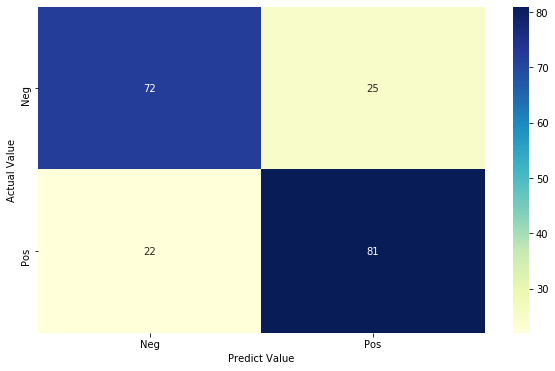

In [59]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_metric, annot = True, cmap = "YlGnBu",
           xticklabels=["Neg", "Pos"],
           yticklabels=["Neg", "Pos"])

plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

In [61]:
accuracy = 0.0 #0 nilam karon sob kisu 0.0 theke suru hoy.and accuracy kokhno int/str ney na .flot ney,tai 0.0
alpha_value = 0.0

for i in np.arange(0.1, 1.1, 0.1): #0.1 theke suru kore 1.1 porjonto jbo and 0.1 ghor kore
    temp_class = MultinomialNB(alpha=i)
    temp_class.fit(atrain, btrain)
    temp_bpredict = temp_class.predict(atest)
    score = accuracy_score(btest, temp_bpredict)
    print(round(i, 1), round(score*100, 2)) #(i, 1)-->dosomik er por ak ghor hbe//(score*100, 2)---> score ke 100 dia gun kore 2 ghoe nibo
    
    if score > accuracy:
        accuracy = score
        alpha_value = i
        
print()
print(round(accuracy*100, 2), round(alpha_value, 1))

0.1 78.0
0.2 78.5
0.3 78.0
0.4 78.0
0.5 77.5
0.6 77.5
0.7 77.5
0.8 77.0
0.9 76.5
1.0 76.5

78.5 0.2


In [63]:
nb_class = MultinomialNB(alpha=0.2)
nb_class.fit(atrain, btrain)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [64]:
def predict_rev(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl  = " ", string = sample_review)
    
    sample_review = sample_review.lower()
    
    review_words = sample_review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words("english"))]
    
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    
    review = ' '.join(review)
    
    temp = count_vec.transform([review]).toarray()
    
    return nb_class.predict(temp)

In [65]:
sample_text = "The food is really good"

if predict_rev(sample_text):
    print("Pos review")
else:
    print("Neg review")

Pos review


In [66]:
sample_text = "The food is really bad"

if predict_rev(sample_text):
    print("Pos review")
else:
    print("Neg review")

Neg review
